# Introduction to A* Algorithm

## What is A* Algorithm?

The A* algorithm is a popular and efficient algorithm used for finding the shortest path between nodes in a graph. It was introduced by Peter Hart, Nils Nilsson, and Bertram Raphael in 1968. A* is widely used in pathfinding and graph traversal, especially in fields like artificial intelligence, robotics, and game development.

## Graphs in A* Algorithm

To understand the A* algorithm, we need to understand the concept of graphs.

### Nodes and Edges

- **Nodes (Vertices):** Represent entities such as cities, routers, or intersections.
- **Edges:** Represent the paths or connections between nodes, with each edge having a weight or cost associated with it.

### Types of Graphs Used in A* Algorithm

- **Directed and Undirected Graphs:** A* can be applied to both directed and undirected graphs.
- **Weighted Graph:** Each edge in the graph must have a weight (non-negative) that represents the cost to traverse from one node to another.

## Key Concepts

### Shortest Path

The main goal of the A* algorithm is to determine the shortest path from a starting node to a target node in the graph. The shortest path is the path with the minimum total weight, considering both the cost to reach a node and an estimate of the cost to reach the target node from there.

### Heuristic Function

A* uses a heuristic function to estimate the cost from a given node to the target node. This heuristic helps to prioritize which paths to explore, making the algorithm more efficient.

**f(n)=g(n)+h(n)**

**g(n)** is the actual cost from the start node to the current node **n**.

**h(n)** is the heuristic estimate of the cost from node **n** to the goal node.

### Priority Queue

A* uses a priority queue to efficiently select the next node to explore based on the combined cost of the path so far and the heuristic estimate.

### Tentative Distance

At each step, the algorithm maintains the shortest known distance from the starting node to each node in the graph. These distances are tentative because they may be updated as the algorithm processes each node.

## How A* Algorithm Works

1. **Initialization:**
   - Set the distance to the starting node to 0 and the distance to all other nodes to infinity.
   - Calculate the heuristic estimate for the starting node.
   - Mark all nodes as unvisited. Create a priority queue and add the starting node with its calculated cost (distance + heuristic).

2. **Iteration:**
   - Remove the node with the smallest cost from the priority queue and set it as the current node.
   - If the current node is the target node, the algorithm terminates, and the shortest path is found.
   - For the current node, consider all of its unvisited neighbors. Calculate their tentative distances through the current node and their heuristic estimates.
   - Compare the newly calculated tentative distance to the current assigned value and assign the smaller one.
   - Add the neighbors to the priority queue with their calculated costs (distance + heuristic).
   - After considering all unvisited neighbors of the current node, mark the current node as visited. A visited node will not be checked again.

3. **Selection:**
   - Select the node from the priority queue with the smallest cost (distance + heuristic) and set it as the new current node.
   - Repeat the process until the target node is reached or the priority queue is empty.

## Visualize

![image.png](https://i.imgur.com/oCBuRVd.gif)

The A* algorithm efficiently finds the shortest path by combining the cost of the path so far and a heuristic estimate of the remaining cost to the target. This balance of exploration and estimation makes A* a powerful and widely used pathfinding algorithm.


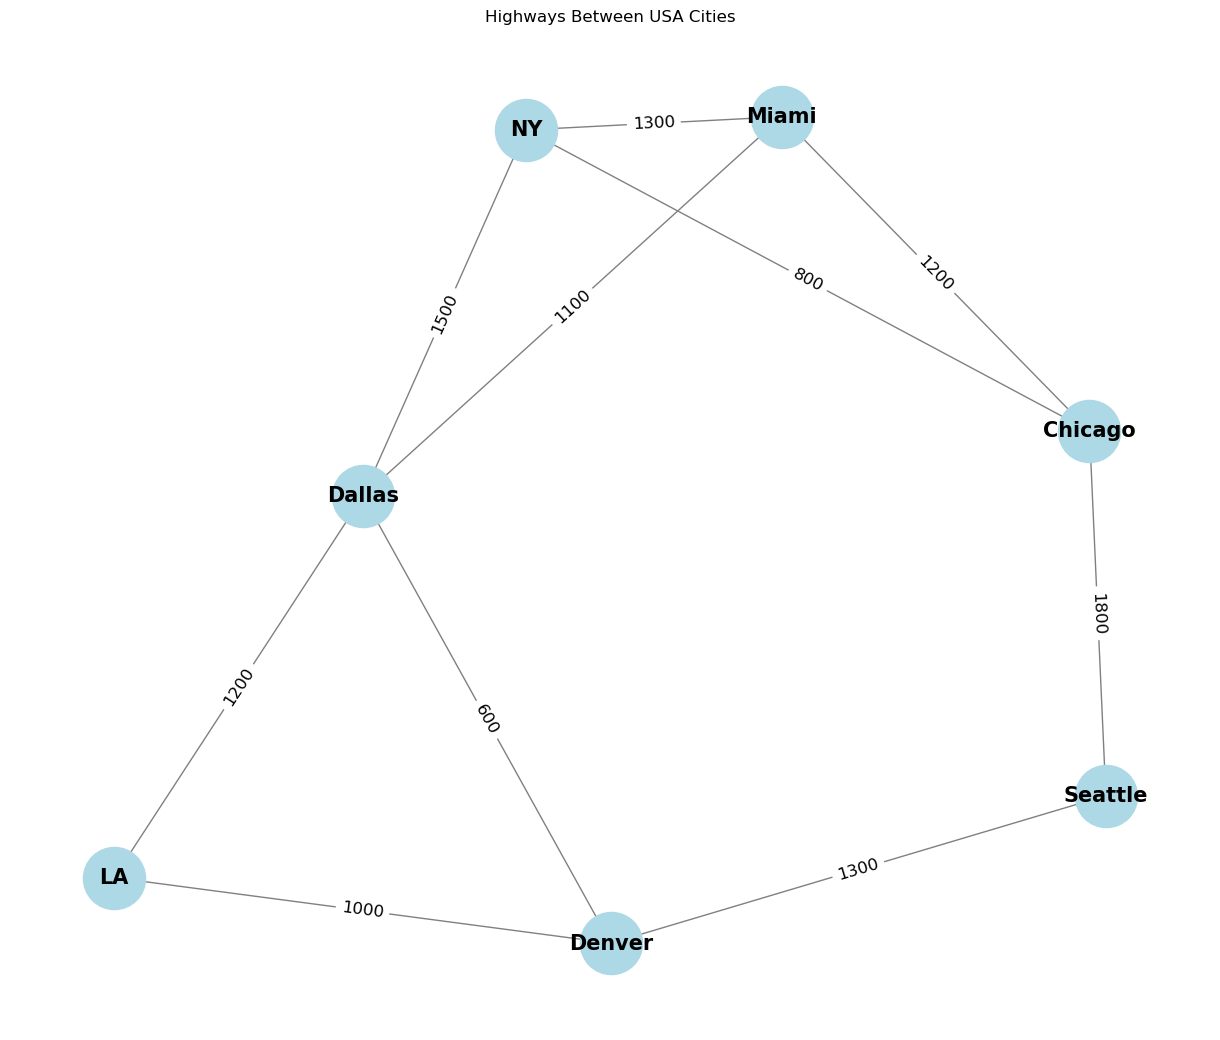

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes representing cities
cities = ['NY', 'LA', 'Denver', 'Dallas', 'Miami', 'Chicago', 'Seattle']
G.add_nodes_from(cities)

# Add weighted edges representing highways with distances (weights)
edges = [
    ('NY', 'Chicago', 800),
    ('NY', 'Dallas', 1500),
    ('NY', 'Miami', 1300),
    ('LA', 'Denver', 1000),
    ('LA', 'Dallas', 1200),
    ('Denver', 'Dallas', 600),
    ('Denver', 'Seattle', 1300),
    ('Dallas', 'Miami', 1100),
    ('Miami', 'Chicago', 1200),
    ('Chicago', 'Seattle', 1800)
]
G.add_weighted_edges_from(edges)

# Define a function to draw the graph
def draw_graph(G, pos, edge_labels=None, node_color='lightblue', edge_color='gray', highlighted_edges=[]):
    plt.figure(figsize=(12, 10))  # Adjust figure size for better spacing
    nx.draw(G, pos, with_labels=True, node_color=node_color, edge_color=edge_color,
            node_size=2000, font_size=15, font_weight='bold', arrows=False)
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    if highlighted_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, edge_color='blue', width=2)
    plt.title('Highways Between USA Cities')
    plt.show()

# Get positions for the nodes using spring layout for better spacing
pos = nx.spring_layout(G)

# Draw the graph initially
draw_graph(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

pos = {
    'NY': (40.7128, -74.0060),
    'LA': (34.0522, -118.2437),
    'Denver': (39.7392, -104.9903),
    'Dallas': (32.7767, -96.7970),
    'Miami': (25.7617, -80.1918),
    'Chicago': (41.8781, -87.6298),
    'Seattle': (47.6062, -122.3321)
}


Starting A* algorithm from node LA to node Chicago

Current node: LA
  Evaluating neighbor Denver:
    Tentative g_score: 1000
    Current g_score of neighbor Denver: inf
    Updated g_score of neighbor Denver: 1000
    Updated f_score of neighbor Denver: 1140.734659734196
    Denver has been added to the open list
  Evaluating neighbor Dallas:
    Tentative g_score: 1200
    Current g_score of neighbor Dallas: inf
    Updated g_score of neighbor Dallas: 1200
    Updated f_score of neighbor Dallas: 1334.884960677531
    Dallas has been added to the open list
Open list: [(1140.734659734196, 'Denver'), (1334.884960677531, 'Dallas')]

Current node: Denver
  Evaluating neighbor LA:
    Tentative g_score: 2000
    Current g_score of neighbor LA: 0
  Evaluating neighbor Dallas:
    Tentative g_score: 1600
    Current g_score of neighbor Dallas: 1200
  Evaluating neighbor Seattle:
    Tentative g_score: 2300
    Current g_score of neighbor Seattle: inf
    Updated g_score of neighbor Seattle:

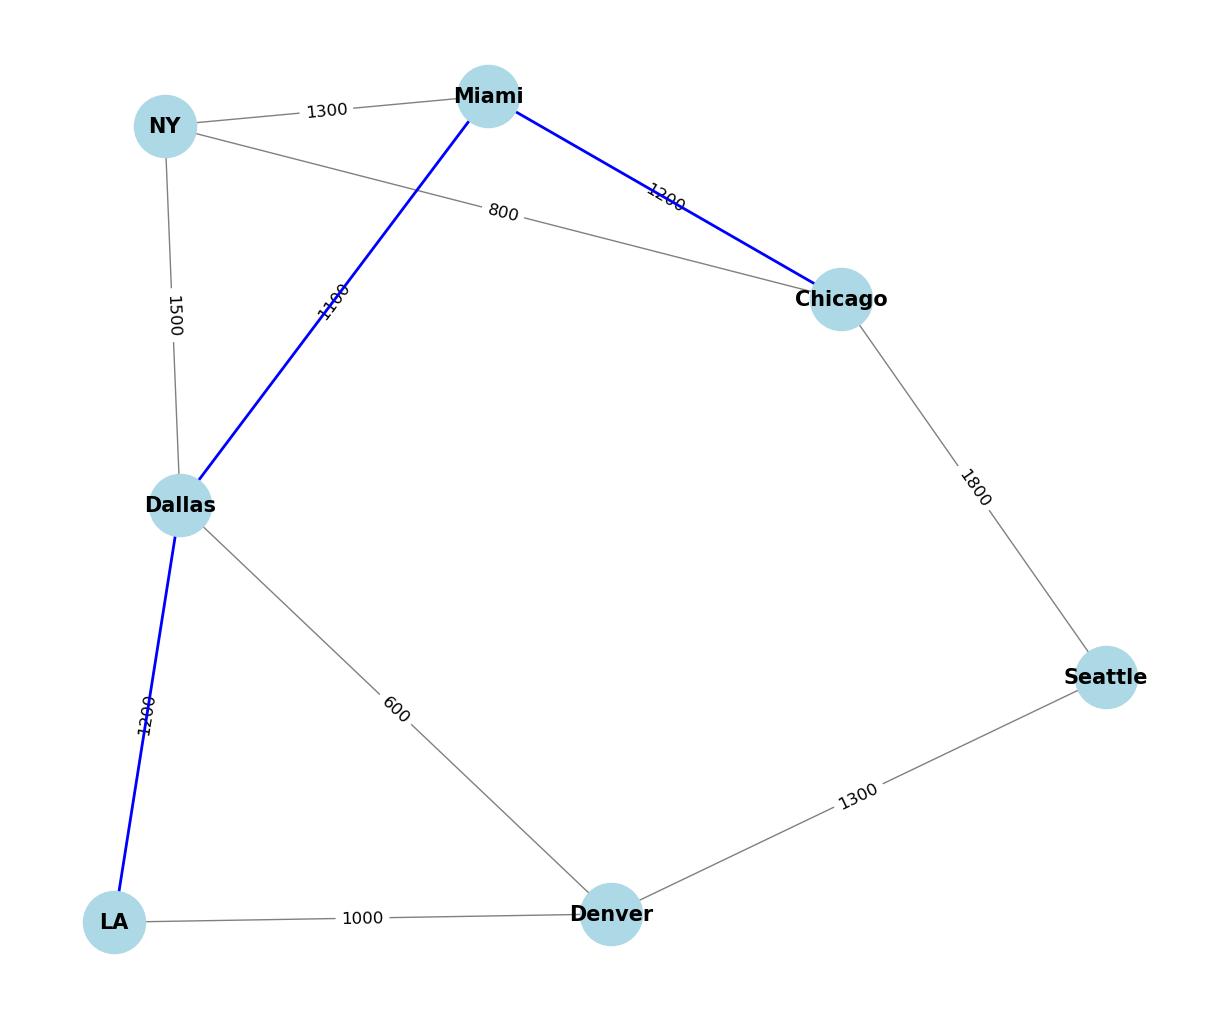

In [19]:

import heapq
import math

def heuristic(a, b):
    """Heuristic function for A* algorithm using Haversine formula."""
    lat_a, lon_a = pos[a]
    lat_b, lon_b = pos[b]
    
    # Convert latitude and longitude from degrees to radians
    lat_a_rad = math.radians(lat_a)
    lon_a_rad = math.radians(lon_a)
    lat_b_rad = math.radians(lat_b)
    lon_b_rad = math.radians(lon_b)
    
    # Haversine formula
    dlon = lon_b_rad - lon_a_rad
    dlat = lat_b_rad - lat_a_rad
    a = math.sin(dlat/2)**2 + math.cos(lat_a_rad) * math.cos(lat_b_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c  # Earth radius in kilometers (you can adjust this value if needed)
    
    return distance

def a_star_algorithm(G, start, goal):
    """Perform A* algorithm to find the shortest path from start to goal in graph G."""
    open_list = []
    heapq.heappush(open_list, (0, start))
    
    came_from = {}
    g_score = {node: float('inf') for node in G.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in G.nodes}
    f_score[start] = heuristic(start, goal)
    
    print(f"Starting A* algorithm from node {start} to node {goal}")
    
    while open_list:
        _, current = heapq.heappop(open_list)
        print(f"\nCurrent node: {current}")
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            print(f"Path found: {path[::-1]}")
            return path[::-1]
        
        for neighbor in G.neighbors(current):
            tentative_g_score = g_score[current] + G[current][neighbor]['weight']
            print(f"  Evaluating neighbor {neighbor}:")
            print(f"    Tentative g_score: {tentative_g_score}")
            print(f"    Current g_score of neighbor {neighbor}: {g_score[neighbor]}")
            
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))
                print(f"    Updated g_score of neighbor {neighbor}: {g_score[neighbor]}")
                print(f"    Updated f_score of neighbor {neighbor}: {f_score[neighbor]}")
                print(f"    {neighbor} has been added to the open list")
        
        print(f"Open list: {open_list}")

    print("No path found")
    return None

# Run A* algorithm from node 'NY' to node 'Seattle'
start_node = 'LA'
goal_node = 'Chicago'
path = a_star_algorithm(G, start_node, goal_node)

# Highlight the path found by A* algorithm, if a path was found
if path:
    edges_in_path = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    pos = nx.spring_layout(G)  # Get positions for the nodes using spring layout
    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray',
            node_size=2000, font_size=15, font_weight='bold', arrows=False)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=12)
    nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='blue', width=2)
    plt.show()
else:
    print("No path found")